In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load training data

In [2]:
df = pd.read_csv('/home/manhtt9/Documents/notebooks/Kaggle/kaggle/train.tsv', sep='\t')

In [3]:
df.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


## X and Y

In [4]:
Y = df[['price']]
X = df[['name', 'item_condition_id', 'category_name', 'brand_name', 'shipping', 'item_description']]

In [5]:
Y.median()
Y.mean()

price    26.737516
dtype: float64

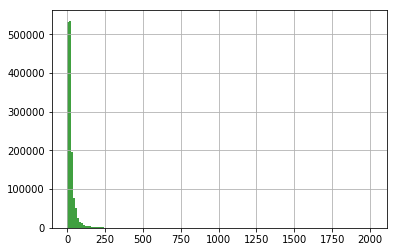

In [6]:
b = 150

n, bins, patches = plt.hist(Y.price, bins=b, facecolor='green', alpha=0.75)
plt.grid()
plt.show()

### X

#### Shipping

In [7]:
X[X.shipping == 0].shape[0]

819435

In [8]:
X[X.shipping == 1].shape[0]

663100

#### Brand

In [9]:
X.brand_name.dropna().count()

849853

In [10]:
brand_count = X.groupby('brand_name')['name'].count()

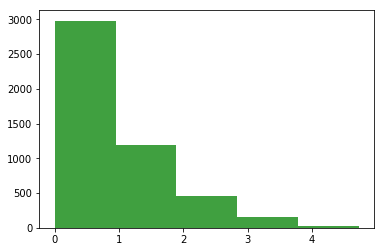

In [25]:
b = 5
n, bins, patches = plt.hist(np.log10(brand_count), bins=b, facecolor='green', alpha=0.75)
plt.show()

In [15]:
list_brand_count = list(brand_count)

In [17]:
sort_brand_count = sorted(list_brand_count)

In [22]:
brand_count.max()

54088

In [24]:
sort_brand_count[4808]

54088

In [42]:
brand_names = X['brand_name']

In [62]:
brand_names_list = list(brand_names.dropna().drop_duplicates().values)

In [63]:
brand_names_list.sort()

In [67]:
brand_names_dict = {}
i = 0
for b in brand_names_list:
    brand_names_dict[i] = b.replace('\t', ' ').strip()
    i += 1

In [70]:
import json
result = json.dumps(brand_names_dict)

In [73]:
with open('/home/manhtt9/Documents/notebooks/Kaggle/kaggle/brands.json', 'w') as f:
    f.write(result)

#### Categories

In [74]:
categories = X.category_name

In [80]:
categories_name = list(categories.dropna().drop_duplicates().values)

In [82]:
dict_categories = {}
i = 0
for c in categories_name:
    csplt = c.split('/')
    for cp in csplt:
        if cp not in dict_categories:
            dict_categories[cp] = i
            i += 1

In [84]:
result_categories = json.dumps(dict_categories)
with open('/home/manhtt9/Documents/notebooks/Kaggle/categories.json', 'w') as f:
    f.write(result_categories)